# Análise Abordagens Solução Clique Máximo

#### Abordagens Utilizadas

1. **Abordagem Exaustiva:** Esta é a técnica mais direta e abrangente, onde todas as possíveis soluções de um problema são examinadas para encontrar a resposta correta. Embora seja um método garantido para encontrar a solução, se existir, ele tende a ser extremamente demorado e ineficiente, especialmente para problemas de grande escala, devido à necessidade de explorar todas as combinações possíveis.

2. **Abordagem com OpenMP:** OpenMP (Open Multi-Processing) é uma API que suporta a programação multi-threaded em C, C++ e Fortran. Esta abordagem permite dividir um problema em várias partes menores que podem ser processadas em paralelo. Ao distribuir a carga de trabalho entre múltiplos núcleos de processadores, o OpenMP pode reduzir significativamente o tempo de resolução de problemas, melhorando a eficiência em comparação com a abordagem exaustiva.

3. **Abordagem com MPI:** MPI, ou Message Passing Interface, é um protocolo padrão usado para comunicação entre processos em um sistema de computadores distribuídos. Esta abordagem é particularmente útil para problemas que podem ser divididos em sub-tarefas independentes, que são então distribuídas por vários computadores ou núcleos. O MPI é eficaz para escalar problemas para sistemas muito grandes, oferecendo uma solução robusta e escalável para problemas complexos e de grande escala.

### Tempos de execussão em relacao a número de vertices

In [ ]:
# Abordagem Exaustiva
'''
10 vertices = 17ms
20 vertices = 117ms
30 vertices = 403ms
40 vertices = 534ms
50 vertices = 821ms
60 vertices = 911ms
70 vertices = 1267ms
80 vertices = 2347ms
'''

# Abordagem com Threads OpenMP
'''
10 vertices = 52ms
20 vertices = 127ms
30 vertices = 311ms
40 vertices = 408ms
50 vertices = 552ms
60 vertices = 762ms
70 vertices = 1092ms
80 vertices = 1897mss
'''

# Abordagem com OpenMPI
'''
10 vertices = 83ms
20 vertices = 131ms
30 vertices = 250ms
40 vertices = 341ms
50 vertices = 478ms
60 vertices = 602ms
70 vertices = 823ms
80 vertices = 987mss
'''

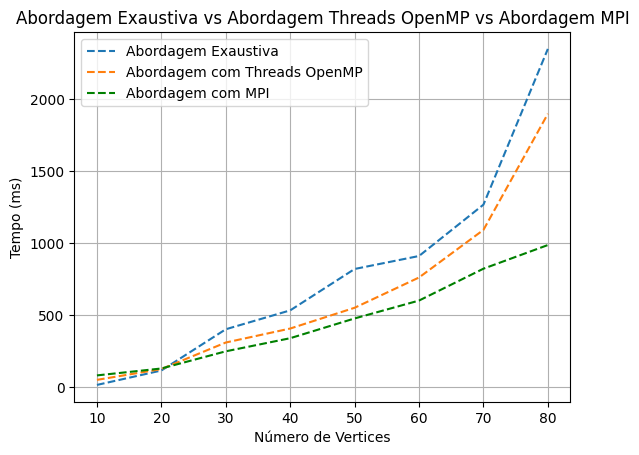

In [3]:
import matplotlib.pyplot as plt

vertices = [10, 20, 30, 40, 50, 60, 70, 80]
aboradgem_exaustiva = [17, 117, 403, 534, 821, 911, 1267, 2347]
aboradgem_threads = [52, 127, 311, 408, 552, 762, 1092, 1897]
aboradgem_mpi = [83, 131, 250, 341, 478, 602, 823, 987]

plt.plot(vertices, aboradgem_exaustiva, label='Abordagem Exaustiva', linestyle='--')
plt.plot(vertices, aboradgem_threads, label='Abordagem com Threads OpenMP', linestyle='--')
plt.plot(vertices, aboradgem_mpi, label='Abordagem com MPI', linestyle='--', color= 'green')
plt.xlabel('Número de Vertices')
plt.ylabel('Tempo (ms)')
plt.title('Abordagem Exaustiva vs Abordagem Threads OpenMP vs Abordagem MPI')
plt.legend()
plt.grid(True)
plt.show()

### Observações sobre comportamento de tempos

1. **Comportamento Geral das Abordagens**:
   - A abordagem exaustiva mostra um aumento significativo no tempo de execução conforme o número de vértices cresce, o que é esperado para métodos que examinam todas as possíveis combinações em um problema combinatorial.
   - A abordagem com threads OpenMP tem um crescimento mais suave no tempo de execução em comparação com a exaustiva, refletindo os benefícios do paralelismo em sistemas de memória compartilhada.
   - A abordagem MPI exibe o menor aumento de tempo com o número crescente de vértices, o que sugere que a comunicação entre processos separados é altamente eficiente, especialmente para sistemas de computação distribuída ou paralela.

2. **Análise Comparativa dos Tempos de Execução**:
   - Para grafos de 10 vértices, a abordagem exaustiva é a mais rápida, com as abordagens OpenMP e MPI mostrando tempos de execução ligeiramente maiores devido ao overhead de inicialização e gestão do paralelismo.
   - À medida que o número de vértices aumenta, tanto OpenMP quanto MPI melhoram seu desempenho em relação à abordagem exaustiva. Notavelmente, a partir de 30 vértices, a abordagem MPI supera consistentemente as outras, indicando que o custo de comunicação entre processos é efetivamente amortizado.

3. **Eficiência e Escalabilidade do Paralelismo**:
   - A curva da abordagem MPI demonstra uma escalabilidade notável, com uma taxa de crescimento do tempo de execução menor do que as abordagens exaustiva e OpenMP. Isso é indicativo de uma gestão eficiente dos recursos computacionais e da comunicação entre processos em um ambiente distribuído.
   - A abordagem com threads OpenMP, embora eficiente, não é tão escalável quanto a MPI, o que pode ser atribuído a desafios na sincronização de threads e na limitação dos recursos em ambientes de memória compartilhada.

4. **Considerações para a Escolha da Abordagem**:
   - Para problemas de menor escala com grafos pequenos, a abordagem exaustiva pode ser suficiente e mais direta de implementar.
   - À medida que o tamanho do problema aumenta, o uso de paralelismo se torna mais benéfico. Neste contexto, a abordagem MPI se destaca como a mais eficiente para grandes conjuntos de dados, sendo particularmente adequada para ambientes com múltiplos computadores ou clusters.
   - A decisão entre usar OpenMP ou MPI pode também ser influenciada pela infraestrutura disponível e pelo perfil de desempenho desejado, onde o MPI é geralmente preferido para sistemas distribuídos e o OpenMP para sistemas com memória compartilhada centralizada.

Com base nos resultados, a abordagem MPI mostra-se como a opção mais promissora para resolver o problema de identificação do clique máximo em grafos grandes, devido à sua capacidade superior de escalar com o tamanho do problema e à sua eficiência em ambientes de computação paralela ou distribuída.